## **Type Classification | TMNIST**

This notebook is aim to perform classification on TMNIST Alphabet (94 characters) dataset with a model with CNN. And we observed that the accuracy of the 11 layer model is about 93.52%.
### **Import libraries and dataset**

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.initializers import *
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from tensorflow.keras.applications import VGG16
from tensorflow.keras.utils import to_categorical
import warnings
warnings.filterwarnings("ignore")

In [4]:
df=pd.read_csv('/content/drive/MyDrive/94_character_TMNIST.csv')
df.head()

,names,labels,1,2,3,4,5,6,7,8,...,775,776,777,778,779,780,781,782,783,784
0,Salsa-Regular,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,MouseMemoirs-Regular,D,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Creepster-Regular,f,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,SeoulNamsan-Light,/,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,HachiMaruPop-Regular,F,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
#size of dataframe
print('Total number of rows in datafame',df.shape[0])
#getting total number of unique classes present in the dataframe
num_classes=df['labels'].nunique()
print('Total number of classes are ',num_classes)
#printing all the unique classes
print('All classes :',df['labels'].unique())
#getting the total number of font types present in the data
num_font=df['names'].nunique()
print('The total number of different type of fonts present are -',num_font)

Total number of rows in datafame 274093
Total number of classes are  94
All classes : ['6' 'D' 'f' '/' 'F' 'x' 'J' '8' 'H' 'k' '@' '1' '=' 'g' ')' '2' 'd' '^'
 '3' 't' '#' '.' '4' 'o' '"' 'y' 'A' 'u' 'G' '-' 'm' 'W' '&' 'c' '9' 'N'
 ']' 'P' 'X' '|' '}' 'h' '7' 'j' '5' '>' '?' 'b' '*' 'w' 'l' '0' '$' 'I'
 'Y' '%' ':' 'T' 'K' 'E' '<' 'V' '{' 'M' 'S' 'a' 'i' 'r' "'" 'p' ';' '['
 '+' 'e' 'U' '(' 's' '~' ',' 'C' 'q' '_' 'n' 'B' 'z' 'v' 'O' 'R' '`' 'Z'
 'Q' 'L' '!' '\\']
The total number of different type of fonts present are - 2990


#### **Split data into train and test sets and reshaping for CNN**

In [7]:
#get independent variable and response variable
X = df.drop(columns=['names','labels'])
y = df[['labels']]

In [8]:
#preping the data to create dictionary
labels = y['labels'].unique()
values = [num for num in range(len(df['labels'].unique()))]
label_dict= dict(zip(labels,values)) #Creating Dictionary 
label_dict_inv = dict(zip(values,labels))
y['labels'].replace(label_dict, inplace=True) #Maping Values avaliable for later traning

#splitiing the data into test and train
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=42,stratify=y)
#the pixel values are from 0-255, for neural network models we are squishing them between 0-1 
X_train= (X_train.astype('float32'))/255.0
X_test = (X_test.astype('float32'))/255.0
X_train=X_train.values.reshape(X_train.shape[0],28,28,1)
X_test=X_test.values.reshape(X_test.shape[0],28,28,1)
#Target into Categorical Values
NCl = y_train.nunique()[0]
y_train = to_categorical(y_train, NCl, dtype='int' )
y_test = to_categorical(y_test, NCl, dtype='int' )

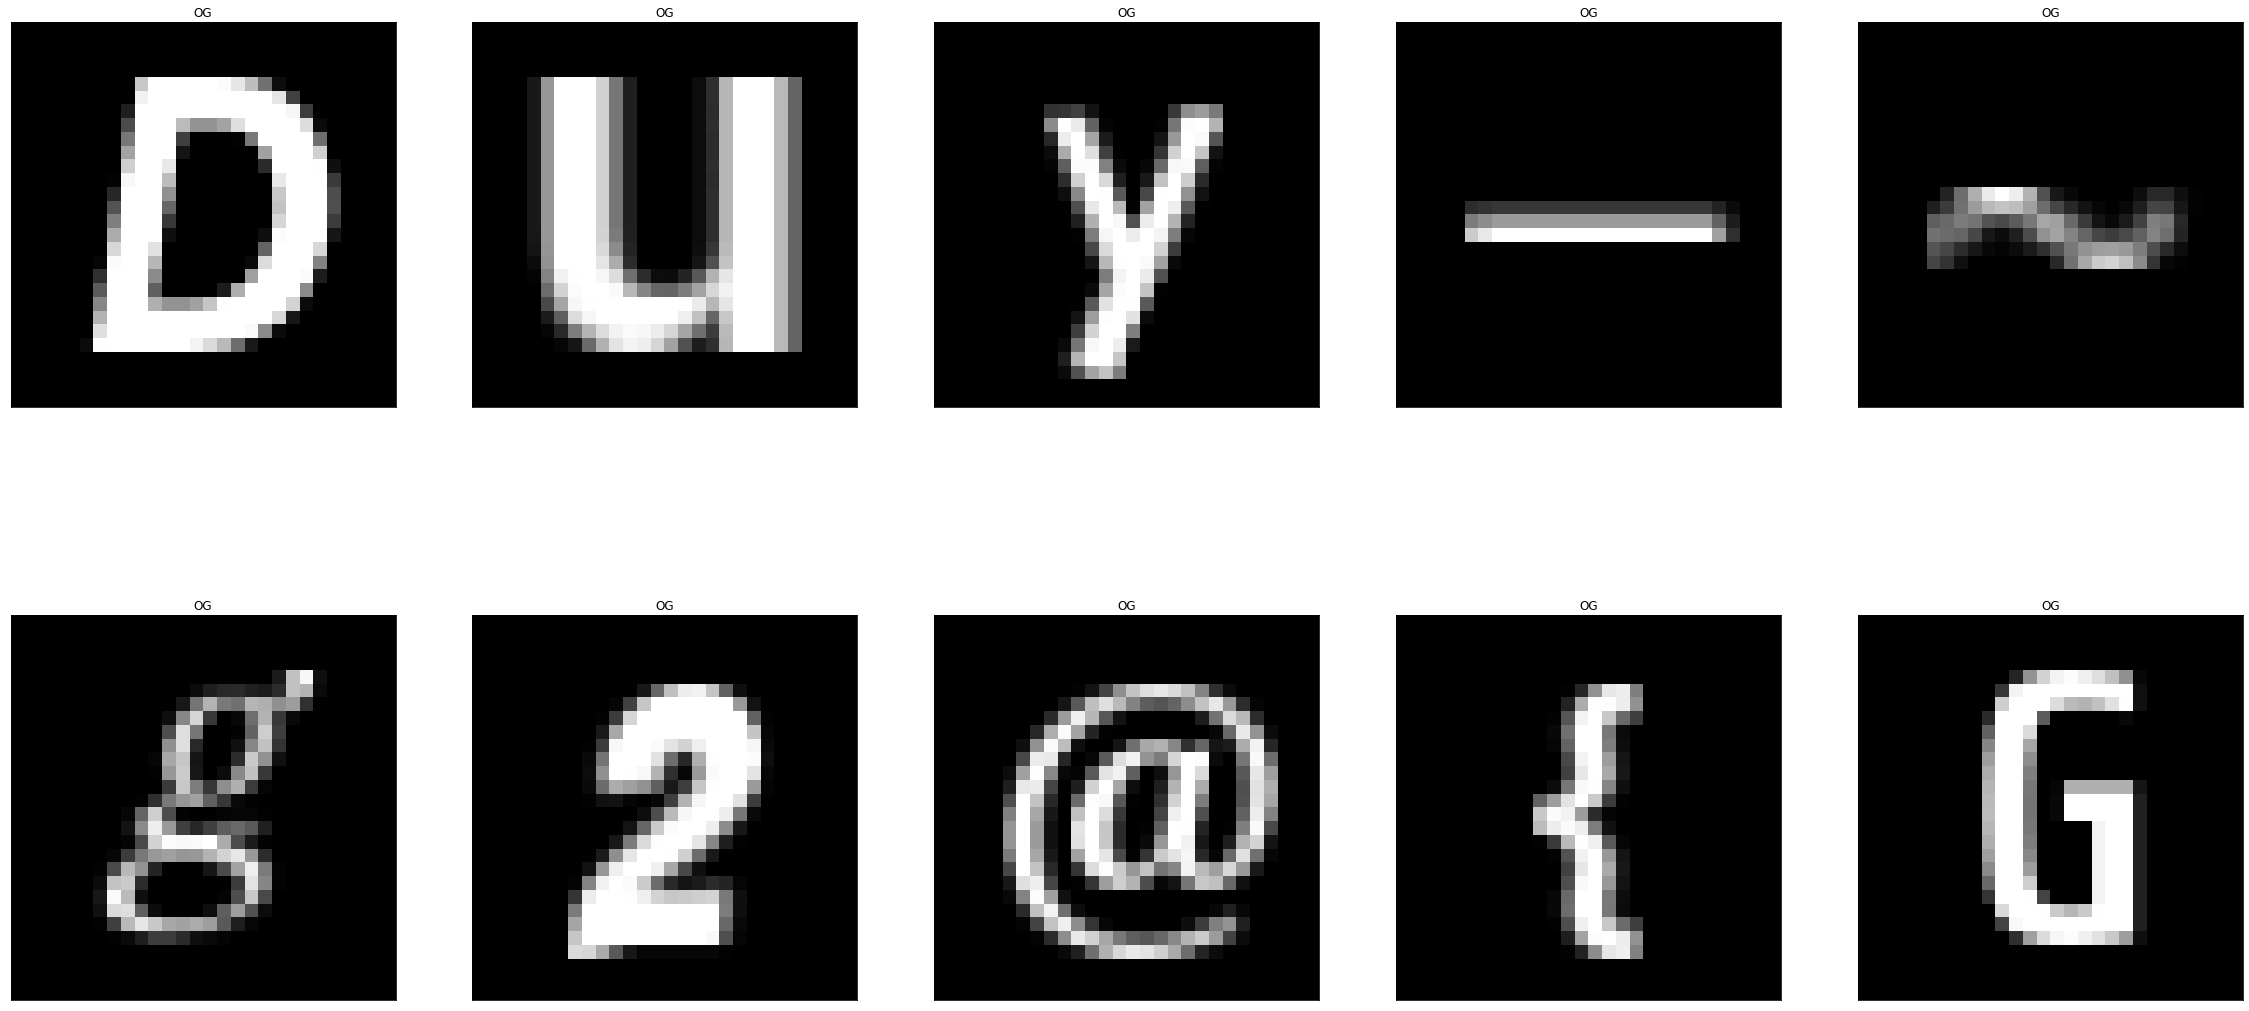

In [9]:
# display 10 example img of dataset
n = 10
plt.figure(figsize=(40, 20))
for i in range(n):
  ax = plt.subplot(2, 5, i + 1)
  plt.imshow(np.reshape(X_test[i], (28, 28)), cmap = 'Greys')
  plt.title("OG")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()

### **Build Model with CNN and training**

First pass input through conv2d layers with 128, 64, 32 nodes and maxpooling layers with 2x2 size of filter separatly. conv2d layers early working eith 7x7 kernels and quickly shrink to 3x3. These conv2d layers also along with relu activation fucntion.  Here we try to use maxpooling to reduce computational load and overfitting. 

In [17]:
model = Sequential()
model.add(Conv2D(256, (7, 7), activation='relu', input_shape=(28, 28,1)))
model.add(MaxPooling2D((2, 2), strides=2))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2), strides=2))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2), strides=2))
model.add(Flatten())
initializer = GlorotUniform()
model.add(Dense(256,activation='relu',kernel_initializer=initializer))
model.add(Dense(64,activation='relu',kernel_initializer=initializer))
model.add(Dense(32, activation='relu',kernel_initializer=initializer))
#number of last dense layer's unit is set as number of classes and using softmax activation for this multiclass model
model.add(Dense(num_classes, activation='softmax'))
opt = Adam()
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 22, 22, 256)       12800     
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 11, 11, 256)      0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 9, 9, 128)         295040    
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 4, 4, 128)        0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 2, 2, 64)          73792     
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 1, 1, 64)        

We pass (28,28,1) imput matrix to 3 conv2d and 3 maxpooling layer and obtain feature information. after flattern them, we pass the data through fully connected layer with unit number be multiclass number. Also applied the GlorotUniform network initializer and tunning epochs numbers below.

In [18]:
#fitting the model
model_history=model.fit(X_train, y_train, epochs=40, validation_data=(X_test, y_test), verbose=2,batch_size=128)

Epoch 1/40
1499/1499 - 20s - loss: 0.9542 - accuracy: 0.7414 - val_loss: 0.4846 - val_accuracy: 0.8508 - 20s/epoch - 14ms/step
Epoch 2/40
1499/1499 - 19s - loss: 0.4239 - accuracy: 0.8643 - val_loss: 0.3834 - val_accuracy: 0.8751 - 19s/epoch - 13ms/step
Epoch 3/40
1499/1499 - 19s - loss: 0.3386 - accuracy: 0.8898 - val_loss: 0.3065 - val_accuracy: 0.9046 - 19s/epoch - 13ms/step
Epoch 4/40
1499/1499 - 19s - loss: 0.2824 - accuracy: 0.9102 - val_loss: 0.2676 - val_accuracy: 0.9195 - 19s/epoch - 13ms/step
Epoch 5/40
1499/1499 - 19s - loss: 0.2488 - accuracy: 0.9202 - val_loss: 0.2751 - val_accuracy: 0.9166 - 19s/epoch - 13ms/step
Epoch 6/40
1499/1499 - 19s - loss: 0.2261 - accuracy: 0.9269 - val_loss: 0.2452 - val_accuracy: 0.9256 - 19s/epoch - 13ms/step
Epoch 7/40
1499/1499 - 19s - loss: 0.2102 - accuracy: 0.9313 - val_loss: 0.2364 - val_accuracy: 0.9264 - 19s/epoch - 13ms/step
Epoch 8/40
1499/1499 - 19s - loss: 0.1960 - accuracy: 0.9349 - val_loss: 0.2372 - val_accuracy: 0.9255 - 19s/ep

### **Evaluation**

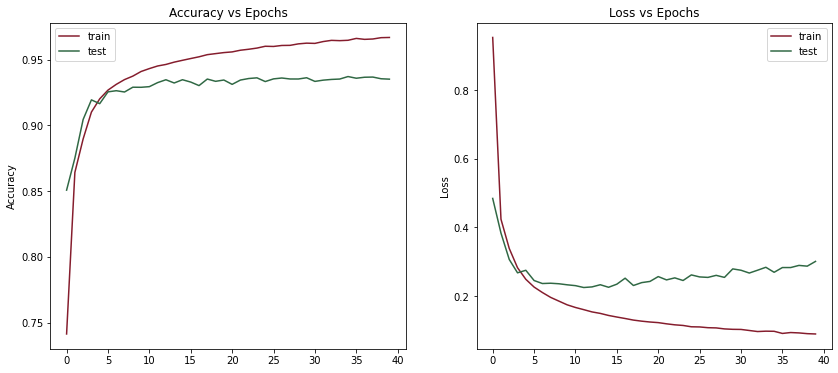

In [19]:
plt.figure(figsize=(14, 6))
plt.subplot(1,2,1)
epochs=np.arange(40)
plt.title('Accuracy vs Epochs')
plt.plot(epochs,model_history.history['accuracy'],label='train', color='#851D2D')
plt.ylabel('Accuracy')
plt.plot(epochs,model_history.history['val_accuracy'],label='test', color='#306844')
plt.legend()
plt.subplot(1,2,2)
plt.title('Loss vs Epochs')
plt.plot(epochs,model_history.history['loss'],label='train', color='#851D2D')
plt.ylabel('Loss')
plt.plot(epochs,model_history.history['val_loss'],label='test', color='#306844')
plt.legend()
plt.show()

In [20]:
score = model.evaluate(X_test,y_test, batch_size = 128,verbose = 0)
print(f"Accuracy: {round(score[1],8)*100}%")

Accuracy: 93.521672%


### **Reference and Citation**
[1] https://www.kaggle.com/code/nikbearbrown/tmnist-cnn-starter<br>
[2] https://www.youtube.com/watch?v=AjtX1N_VT9E&t=803s<br>
Code are cited from [1] with modification according to [2].

### **License**

MIT License

Copyright (c) 2022 Yanping Fu

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.